#  PyTorch Lightning

Материалы:
* https://lightning.ai/docs/pytorch/stable/starter/introduction.html
* https://lightning.ai/docs/pytorch/stable/levels/core_skills.html
* https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.core.LightningModule.html#lightning.pytorch.core.LightningModule.log
* https://lightning.ai/docs/pytorch/stable/extensions/logging.html
* https://lightning.ai/docs/pytorch/stable/common/progress_bar.html
* https://lightning.ai/docs/pytorch/stable/common/early_stopping.html
* https://lightning.ai/docs/pytorch/1.6.3/api/pytorch_lightning.utilities.model_summary.html#pytorch_lightning.utilities.model_summary.ModelSummary
* https://torchmetrics.readthedocs.io/en/stable/pages/lightning.html
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/
* https://www.youtube.com/watch?v=XbIN9LaQycQ&list=PLhhyoLH6IjfyL740PTuXef4TstxAK6nGP
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/data/datamodule.html

## Задачи для совместного разбора

1\. Создайте датасет для классификации и обучите модель при помощи PyTorch Lightning.

In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import Any, List, Optional, Union
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    """
    Класс модуля PyTorch Lightning.

    Этот класс определяет структуру модели, шаги обучения, валидации и тестирования,
    а также настройки оптимизатора для обучения.
    """

    def __init__(self):
        """Здесь определяется архитектура модели и инициализируются все необходимые слои."""
        super().__init__()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Определяет прямой проход модели.

        Args:
            x (torch.Tensor): Входной тензор.

        Returns:
            torch.Tensor: Выходной тензор модели.
        """

    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        """
        Выполняет один шаг обучения.

        Args:
            batch (Any): Батч данных для обучения.
            batch_idx (int): Индекс текущего батча.

        Returns:
            torch.Tensor: Значение функции потерь для этого шага.
        """

    def validation_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг валидации.

        Args:
            batch (Any): Батч данных для валидации.
            batch_idx (int): Индекс текущего батча.
        """

    def test_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг тестирования.

        Args:
            batch (Any): Батч данных для тестирования.
            batch_idx (int): Индекс текущего батча.
        """

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        Настраивает оптимизатор для обучения модели.

        Returns:
            torch.optim.Optimizer: Настроенный оптимизатор.
        """

In [ ]:
import torch  as th
import torch.nn
from torch.utils.data import TensorDataset
from torchmetrics import Accuracy

In [ ]:
num_samples, num_features = 1000, 10

train_size = int(num_samples * 0.8)
X = th.randn(num_samples, num_features)
y = th.randint(0, 2, (num_samples, ))

dataset_train = TensorDataset(X[:train_size], y[:train_size])
dataset_val = TensorDataset(X[train_size:], y[train_size:])

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import Any, List, Optional, Union
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    """
    Класс модуля PyTorch Lightning.

    Этот класс определяет структуру модели, шаги обучения, валидации и тестирования,
    а также настройки оптимизатора для обучения.
    """

    def __init__(self, n_inputs: int, n_hidden: int, n_out: int) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_out),
        )

        self.criterion = nn.CrossEntropyLoss()
        self.accuracy = Accuracy(task="binary")


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)


    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        x, y = batch
        logits = self(x) # self.forward(x)
        loss = self.criterion(logits, y)

        # доп. метрики
        preds = logits.argmax(dim=1)
        acc = self.accuracy(preds, y)

        # logging
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)

        return loss

    def validation_step(self, batch: Any, batch_idx: int) -> None:
        x, y = batch
        logits = self(x) # self.forward(x)

        # доп. метрики
        preds = logits.argmax(dim=1)
        acc = self.accuracy(preds, y)
        self.log("val_acc", acc, prog_bar=True)


    def test_step(self, batch: Any, batch_idx: int) -> None:
        x, y = batch
        logits = self(x) # self.forward(x)

        # доп. метрики
        preds = logits.argmax(dim=1)
        acc = self.accuracy(preds, y)
        self.log("test_acc", acc, prog_bar=True)

    def configure_optimizers(self) -> torch.optim.Optimizer:
        return th.optim.Adam(self.parameters(), lr=0.001)

In [ ]:
from torch.utils.data import DataLoader

class MyDataModule(pl.LightningDataModule):
    def __init__(self, num_samples: int, num_features: int, batch_size: int):
        super().__init__()
        self.num_samples = num_samples
        self.num_features = num_features
        self.batch_size = batch_size

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Настраивает данные для использования на каждом этапе (обучение/валидация/тестирование).

        Args:
            stage (Optional[str]): Этап, на котором вызывается метод ("fit" или "test").
        """
        train_size = int(self.num_samples * 0.8)
        X = th.randn(self.num_samples, self.num_features)
        y = th.randint(0, 2, (self.num_samples, ))

        self.dataset_train = TensorDataset(X[:train_size], y[:train_size])
        self.dataset_val = TensorDataset(X[train_size:], y[train_size:])

    def train_dataloader(self) -> DataLoader:
        return DataLoader(self.dataset_train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self) -> DataLoader:
        return DataLoader(self.dataset_val, batch_size=self.batch_size, shuffle=False)

In [ ]:
model = MyLightningModule(10, 10, 2)
data_module = MyDataModule(1000, 10, 32)

trainer = pl.Trainer(
    max_epochs=10,
    log_every_n_steps=1,
)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | Sequential       | 132    | train
1 | criterion | CrossEntropyLoss | 0      | train
2 | accuracy  | BinaryAccuracy   | 0      | train
-------------------------------------------------------
132       Trainable params
0         Non-trainable params
132       Total params
0.001     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
class MyDataModule(pl.LightningDataModule):
    """
    Класс модуля данных PyTorch Lightning.

    Этот класс отвечает за загрузку, подготовку и предоставление данных
    для обучения, валидации и тестирования модели.
    """

    def __init__(self):
        """
        Инициализирует модуль данных.

        Args:
            data_dir (str): Путь к директории с данными.
        """
        super().__init__()

    def prepare_data(self) -> None:
        """
        Подготавливает данные для использования.

        Здесь можно выполнить загрузку данных или другие подготовительные операции.
        """
        pass

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Настраивает данные для использования на каждом этапе (обучение/валидация/тестирование).

        Args:
            stage (Optional[str]): Этап, на котором вызывается метод ("fit" или "test").
        """

    def train_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для обучающих данных.

        Returns:
            DataLoader: DataLoader с обучающими данными.
        """

    def val_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для данных валидации.

        Returns:
            DataLoader: DataLoader с данными валидации.
        """


    def test_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для тестовых данных.

        Returns:
            DataLoader: DataLoader с тестовыми данными.
        """

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv`. Выполните следующую процедуру предобработки:
- замените цены `Weekly_Sales` на логарифм цены;
- удалите столбец с датами;
- закодируйте столбцы `Store` и `Holiday_Flag` при помощи `TargetEncoder` (см. пакет [category_encoders](https://contrib.scikit-learn.org/category_encoders/));
- после кодирование выполните стандартизацию признаков;
- разбейте выборку на обучающее, валидационное и тестовое множество.

Все преобразования допускает делать при помощи `numpy`, `pandas` и `sklearn`.

- [ ] Проверено на семинаре

In [ ]:
#pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/Walmart.csv')
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data['Weekly_Sales'] = np.log(data['Weekly_Sales'])
data = data.drop(columns=['Date'])
encoder = ce.TargetEncoder(cols=['Store','Holiday_Flag'])
encoder.fit(data, data['Weekly_Sales'])
data_cleaned = encoder.transform(data)

X = data_cleaned.drop(columns=['Weekly_Sales'])
y = data_cleaned['Weekly_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
y_scaled = scaler.fit_transform(pd.DataFrame(y))

In [ ]:
X_scaled

array([[ 0.95702981, -0.27420425, -0.99513556, -1.71379998,  1.00417522,
         0.05696366],
       [ 0.95702981,  3.64691651, -1.20117022, -1.76608938,  1.00788038,
         0.05696366],
       [ 0.95702981, -0.27420425, -1.12417832, -1.84016603,  1.009074  ,
         0.05696366],
       ...,
       [-0.23848266, -0.27420425, -0.33582468,  1.39741931,  0.52724129,
         0.35604577],
       [-0.23848266, -0.27420425, -0.22738539,  1.32987884,  0.52733249,
         0.35604577],
       [-0.23848266, -0.27420425, -0.09834264,  1.14032976,  0.52677459,
         0.35604577]])

In [ ]:
X_train, X_h, y_train, y_h = train_test_split(X_scaled, y_scaled, train_size=0.8, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_h, y_h, train_size=0.5)
X_train.shape, y_train.shape, X_test.shape, X_valid.shape

((5148, 6), (5148, 1), (643, 6), (644, 6))

<p class="task" id="2"></p>

2\. В ячейках ниже представлен шаблонный код для обучения модели. В данной версии все реализовано "с нуля": обучение, метрики, визуализация, логирование, логика ранней остановки.

Используя набор данных из предыдущего задания, обучите модель, используя предложенную реализацию. Визуализируйте динамику изменения среднего значения функции потерь и метрик на обучающем и валидационном множестве. Интегрируйте реализацию ранней остановки в цикл обучения. Посчитайте и выведите на экран значения метрик на тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def r2_score(y_true, y_pred):
    total_sum_squares = torch.sum((y_true - y_true.mean())**2)
    residual_sum_squares = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (residual_sum_squares / total_sum_squares)
    return r2

def mape_score(y_true, y_pred):
    return torch.mean(torch.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, n_inputs, h_hidden):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = out.relu()
        out = self.fc2(out)
        return out

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.0001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return self.early_stop

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    train_losses = []
    val_losses = []
    train_r2s = []
    val_r2s = []
    train_mapes = []
    val_mapes = []
    earlystop = EarlyStopping()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_r2 = 0.0
        train_mape = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_r2 += r2_score(targets, outputs).item()
            train_mape += mape_score(targets, outputs).item()

        train_loss /= len(train_loader)
        train_r2 /= len(train_loader)
        train_mape /= len(train_loader)

        train_losses.append(train_loss)
        train_r2s.append(train_r2)
        train_mapes.append(train_mape)

        model.eval()
        val_loss = 0.0
        val_r2 = 0.0
        val_mape = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs).flatten()
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_r2 += r2_score(targets, outputs).item()
                val_mape += mape_score(targets, outputs).item()

        val_loss /= len(val_loader)
        val_r2 /= len(val_loader)
        val_mape /= len(val_loader)

        val_losses.append(val_loss)
        val_r2s.append(val_r2)
        val_mapes.append(val_mape)

        if (epoch+1)%50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if earlystop(val_loss) and early_stopping:
            print('на ', epoch,'обучение остановлено. Итоговая ошибка:',val_loss)
            break

    return train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes

In [ ]:
batch_size = 32
learning_rate = 0.0001
patience = 5
num_epochs = 500

X_train_tensor = th.tensor(np.array(X_train), dtype=th.float32)
y_train_tensor = th.tensor(np.array(y_train), dtype=th.float32).squeeze()

X_valid_tensor = th.tensor(np.array(X_valid), dtype=th.float32)
y_valid_tensor = th.tensor(np.array(y_valid), dtype=th.float32).squeeze()

X_test_tensor = th.tensor(np.array(X_test), dtype=th.float32)
y_test_tensor = th.tensor(np.array(y_test), dtype=th.float32).squeeze()

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_val = TensorDataset(X_valid_tensor, y_valid_tensor)

model = RegressionModel(n_inputs = 6, h_hidden = 10)

train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

criterion = th.nn.MSELoss()
optimizer = th.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping=True)

Epoch 50/500, Train Loss: 0.0513, Val Loss: 0.0602
на  77 обучение остановлено. Итоговая ошибка: 0.053134713942805924


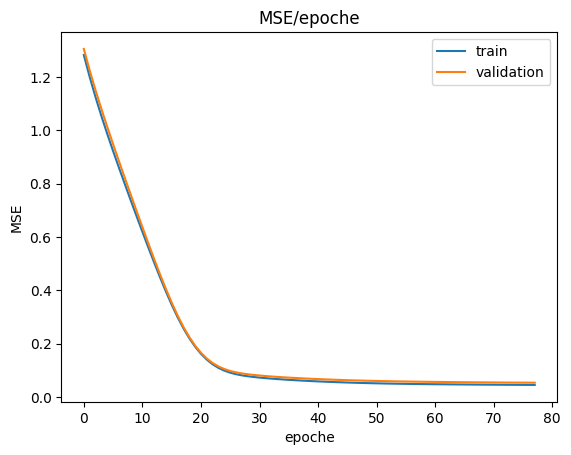

In [ ]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.xlabel("epoche")
plt.ylabel("MSE")
plt.title("MSE/epoche")
plt.legend()
plt.show()

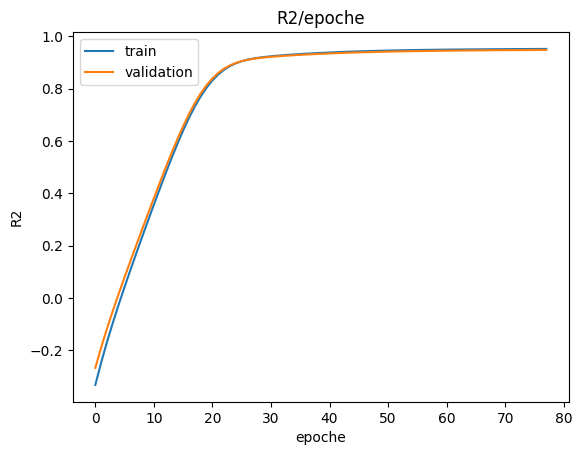

In [ ]:
plt.plot(train_r2s, label='train')
plt.plot(val_r2s, label='validation')
plt.xlabel("epoche")
plt.ylabel("R2")
plt.title("R2/epoche")
plt.legend()
plt.show()

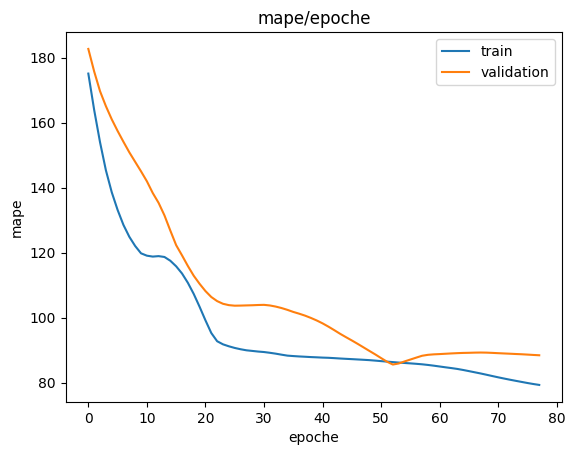

In [ ]:
plt.plot(train_mapes, label='train')
plt.plot(val_mapes, label='validation')
plt.xlabel("epoche")
plt.ylabel("mape")
plt.title("mape/epoche")
plt.legend()
plt.show()

In [ ]:
y_pred = model(X_test_tensor).flatten()

In [ ]:
#Метрики на тесте
r2_score(y_test_tensor, y_pred)

tensor(0.9550, grad_fn=<RsubBackward1>)

In [ ]:
mape_score(y_test_tensor, y_pred)

tensor(78.3868, grad_fn=<MulBackward0>)

<p class="task" id="3"></p>

3\. Перепишите логику обучения модели, используя `pytorch_lightning`. Для расчета метрик $R^2$ и MAPE используйте `torchmetrics`. Ранняя остановка в данном задании не требуется. После завершения обучения посчитайте значения метрик на тестовом множестве.

В процессе обучения настройки progressbar так, что:
* для каждого батча во время обучения рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются;
* для каждого батча во время валидации рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются.

- [ ] Проверено на семинаре

In [ ]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import R2Score, MeanAbsolutePercentageError

class RegressionModelPL(pl.LightningModule):
    def __init__(self, n_inputs, h_hidden, learning_rate=0.0001):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
        self.learning_rate = learning_rate
        self.criterion = nn.MSELoss()

        # Metrics
        self.r2_score = R2Score()
        self.mape = MeanAbsolutePercentageError()

    def forward(self, x):
        out = self.fc1(x).relu()
        return self.fc2(out).squeeze()

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('train_loss', loss, on_step=True, on_epoch=True)
        self.log('train_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('train_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        return loss

#on_step=True: Если этот параметр установлен в True, метрика будет логироваться на каждом шаге (т.е. для каждого батча) во время обучения или валидации.
#Это позволяет отслеживать динамику метрики в реальном времени в процессе обучения.
#on_epoch=True: Если этот параметр установлен в True, метрика будет логироваться в конце каждой эпохи, после завершения всех шагов (батчей) этой эпохи.
#Это позволяет отслеживать общую производительность модели за всю эпоху.

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('val_loss', loss, on_step=True, on_epoch=True)
        self.log('val_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('val_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        return loss

    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('test_loss', loss)
        self.log('test_r2', self.r2_score(outputs, targets))
        self.log('test_mape', self.mape(outputs, targets))

        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

batch_size = 32

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_val = TensorDataset(X_valid_tensor, y_valid_tensor)
dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size)
test_loader = DataLoader(dataset_test, batch_size=batch_size)

model = RegressionModelPL(n_inputs=6, h_hidden=10)
trainer = pl.Trainer(max_epochs=50, enable_progress_bar=True)
trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                        | Params | Mode 
------------------------------------------------------------------
0 | fc1       | Linear                      | 70     | train
1 | fc2       | Linear                      | 11     | train
2 | criterion | MSELoss                     | 0      | train
3 | r2_score  | R2Score                     | 0      | train
4 | mape      | MeanAbsolutePercentageError | 0      | train
------------------------------------------------------------------
81        Trainable params
0         Non-trainable params
81        Total params
0.000     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
test_metrics = trainer.test(model, test_loader)
print("Test Metrics:", test_metrics)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.04097314551472664    │
│         test_mape         │    0.8666353225708008     │
│          test_r2          │     0.913349986076355     │
└───────────────────────────┴───────────────────────────┘

Test Metrics: [{'test_loss': 0.04097314551472664, 'test_r2': 0.913349986076355, 'test_mape': 0.8666353225708008}]


<p class="task" id="4"></p>

4\. Повторите задачу 3, добавив логику ранней остановки, используя callback `pytorch_lightning`. Если значение функции потерь на валидационном множестве не улучшалось в течении 5 эпох, происходит ранняя остановка.

- [ ] Проверено на семинаре

In [ ]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import R2Score, MeanAbsolutePercentageError

class RegressionModelPL(pl.LightningModule):
    def __init__(self, n_inputs, h_hidden, learning_rate=0.0001):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
        self.learning_rate = learning_rate
        self.criterion = nn.MSELoss()

        self.r2_score = R2Score()
        self.mape = MeanAbsolutePercentageError()

    def forward(self, x):
        out = self.fc1(x).relu()
        return self.fc2(out).squeeze()

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('train_loss', loss, on_step=True, on_epoch=True)
        self.log('train_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('train_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('val_loss', loss, on_step=True, on_epoch=True)
        self.log('val_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('val_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        return loss

    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('test_loss', loss)
        self.log('test_r2', self.r2_score(outputs, targets))
        self.log('test_mape', self.mape(outputs, targets))

        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

batch_size = 32

model = RegressionModelPL(n_inputs=6, h_hidden=10, learning_rate=0.001)

# Early stopping callback
early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.0001,      # Minimum change to qualify as an improvement
    patience=5,          # How many epochs to wait for improvement
    verbose=True,        # Verbose logging
    mode='min'           # Minimize the monitored metric
)


trainer = pl.Trainer(
    max_epochs=50,
    enable_progress_bar=True,
    callbacks=[early_stop_callback]  # Add early stopping callback here
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, train_loader, val_loader)

test_metrics = trainer.test(model, test_loader)
print("Test Metrics:", test_metrics)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                        | Params | Mode 
------------------------------------------------------------------
0 | fc1       | Linear                      | 70     | train
1 | fc2       | Linear                      | 11     | train
2 | criterion | MSELoss                     | 0      | train
3 | r2_score  | R2Score                     | 0      | train
4 | mape      | MeanAbsolutePercentageError | 0      | train
------------------------------------------------------------------
81        Trainable params
0         Non-trainable params
81        Total params
0.000     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.350


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.282 >= min_delta = 0.0001. New best score: 0.068


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.014 >= min_delta = 0.0001. New best score: 0.054


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.052


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.051


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.051


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 5 records. Best score: 0.050. Signaling Trainer to stop.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.03746182471513748    │
│         test_mape         │    0.6154566407203674     │
│          test_r2          │    0.9128395915031433     │
└───────────────────────────┴───────────────────────────┘

Test Metrics: [{'test_loss': 0.03746182471513748, 'test_r2': 0.9128395915031433, 'test_mape': 0.6154566407203674}]


<p class="task" id="5"></p>

5\. Повторите задачу 4, оформив набор данных в виде `pytorch_lightning.LightningDataModule`. Всю логику по созданию датасета (преобразования признаков, разбиение и т.д.) запакуйте в метод `setup`.

- [ ] Проверено на семинаре

In [ ]:
import pytorch_lightning as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from torch.utils.data import DataLoader, TensorDataset
import torch
from typing import Optional

class MyDataModule(pl.LightningDataModule):
    """
    Класс модуля данных PyTorch Lightning.

    Этот класс отвечает за загрузку, подготовку и предоставление данных
    для обучения, валидации и тестирования модели.
    """

    def __init__(self, data: pd.DataFrame, batch_size: int = 32):
        """
        Инициализирует модуль данных.

        Args:
            data (pd.DataFrame): Данные для обработки.
            batch_size (int): Размер батча для DataLoader.
        """
        super().__init__()
        self.data = data
        self.batch_size = batch_size
        self.dataset_train = None
        self.dataset_val = None
        self.dataset_test = None

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Настраивает данные для использования на каждом этапе (обучение/валидация/тестирование).

        Args:
            stage (Optional[str]): Этап, на котором вызывается метод ("fit" или "test").
        """
        self.data['Weekly_Sales'] = np.log(self.data['Weekly_Sales'])
        self.data = self.data.drop(columns=['Date'])

        encoder = ce.TargetEncoder(cols=['Store', 'Holiday_Flag'])
        encoder.fit(self.data, self.data['Weekly_Sales'])
        data_cleaned = encoder.transform(self.data)

        X = data_cleaned.drop(columns=['Weekly_Sales'])
        y = data_cleaned['Weekly_Sales']

        scaler_X = StandardScaler()
        X_scaled = scaler_X.fit_transform(X)

        scaler_y = StandardScaler()
        y_scaled = scaler_y.fit_transform(pd.DataFrame(y))

        X_train, X_h, y_train, y_h = train_test_split(X_scaled, y_scaled, train_size=0.8, shuffle=True)
        X_test, X_valid, y_test, y_valid = train_test_split(X_h, y_h, train_size=0.5)

        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()

        X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
        y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32).squeeze()

        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()

        self.dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
        self.dataset_val = TensorDataset(X_valid_tensor, y_valid_tensor)
        self.dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

    def train_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для обучающих данных.

        Returns:
            DataLoader: DataLoader с обучающими данными.
        """
        return DataLoader(self.dataset_train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для данных валидации.

        Returns:
            DataLoader: DataLoader с данными валидации.
        """
        return DataLoader(self.dataset_val, batch_size=self.batch_size, shuffle=False)

    def test_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для тестовых данных.

        Returns:
            DataLoader: DataLoader с тестовыми данными.
        """
        return DataLoader(self.dataset_test, batch_size=self.batch_size, shuffle=False)

data = pd.read_csv('/content/Walmart.csv')
data_module = MyDataModule(data, batch_size=32)

data_module.setup(stage='fit')

train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()
test_loader = data_module.test_dataloader()

Повторение номера 4

In [ ]:
early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    min_delta=0.0001,      # Minimum change to qualify as an improvement
    patience=5,          # How many epochs to wait for improvement
    verbose=True,        # Verbose logging
    mode='min'           # Minimize the monitored metric
)

model = RegressionModelPL(n_inputs=6, h_hidden=10, learning_rate=0.001)
trainer = pl.Trainer(
    max_epochs=50,
    enable_progress_bar=True,
    callbacks=[early_stop_callback]
)
trainer.fit(model, train_loader, val_loader)

test_metrics = trainer.test(model, test_loader)
print("Test Metrics:", test_metrics)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                        | Params | Mode 
------------------------------------------------------------------
0 | fc1       | Linear                      | 70     | train
1 | fc2       | Linear                      | 11     | train
2 | criterion | MSELoss                     | 0      | train
3 | r2_score  | R2Score                     | 0      | train
4 | mape      | MeanAbsolutePercentageError | 0      | train
------------------------------------------------------------------
81        Trainable params
0         Non-trainable params
81        Total params
0.000     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.487


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.377 >= min_delta = 0.0001. New best score: 0.110


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.044 >= min_delta = 0.0001. New best score: 0.066


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.011 >= min_delta = 0.0001. New best score: 0.054


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 0.050


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.048


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.046


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.044


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.044


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.043


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.041


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.041


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.041


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.040


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.040


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.040


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.040


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.039


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 5 records. Best score: 0.039. Signaling Trainer to stop.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.03619007021188736    │
│         test_mape         │    0.5837780833244324     │
│          test_r2          │    0.9595959782600403     │
└───────────────────────────┴───────────────────────────┘

Test Metrics: [{'test_loss': 0.03619007021188736, 'test_r2': 0.9595959782600403, 'test_mape': 0.5837780833244324}]


<p class="task" id="6"></p>

6\. Повторите задачу 5, добавив логирование при помощи `wandb`.

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс `wandb` со всеми нужными визуализациями.

- [ ] Проверено на семинаре

In [ ]:
pip install wandb

In [ ]:
import pytorch_lightning as pl
import pandas as pd
import numpy as np
import wandb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from torch.utils.data import DataLoader, TensorDataset
import torch
from typing import Optional

wandb.init(project="walmart-sales-prediction")

wandb: Currently logged in as: dyakandr (9kefir). Use `wandb login --relogin` to force relogin


In [ ]:
class MyDataModule(pl.LightningDataModule):
    """
    Класс модуля данных PyTorch Lightning.
    """

    def __init__(self, data: pd.DataFrame, batch_size: int = 32):
        super().__init__()
        self.data = data
        self.batch_size = batch_size
        self.dataset_train = None
        self.dataset_val = None
        self.dataset_test = None

    def setup(self, stage: Optional[str] = None) -> None:
        self.data['Weekly_Sales'] = np.log(self.data['Weekly_Sales'])
        self.data = self.data.drop(columns=['Date'])

        encoder = ce.TargetEncoder(cols=['Store', 'Holiday_Flag'])
        encoder.fit(self.data, self.data['Weekly_Sales'])
        data_cleaned = encoder.transform(self.data)

        X = data_cleaned.drop(columns=['Weekly_Sales'])
        y = data_cleaned['Weekly_Sales']

        scaler_X = StandardScaler()
        X_scaled = scaler_X.fit_transform(X)

        scaler_y = StandardScaler()
        y_scaled = scaler_y.fit_transform(pd.DataFrame(y))

        X_train, X_h, y_train, y_h = train_test_split(X_scaled, y_scaled, train_size=0.8, shuffle=True)
        X_test, X_valid, y_test, y_valid = train_test_split(X_h, y_h, train_size=0.5)

        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()

        X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
        y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32).squeeze()

        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()

        self.dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
        self.dataset_val = TensorDataset(X_valid_tensor, y_valid_tensor)
        self.dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

    def train_dataloader(self) -> DataLoader:
        return DataLoader(self.dataset_train, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self) -> DataLoader:
        return DataLoader(self.dataset_val, batch_size=self.batch_size, shuffle=False)

    def test_dataloader(self) -> DataLoader:
        return DataLoader(self.dataset_test, batch_size=self.batch_size, shuffle=False)

class RegressionModelPL(pl.LightningModule):
    def __init__(self, n_inputs, h_hidden, learning_rate=0.0001):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
        self.learning_rate = learning_rate
        self.criterion = nn.MSELoss()
        self.r2_score = R2Score()
        self.mape = MeanAbsolutePercentageError()

    def forward(self, x):
        out = self.fc1(x).relu()
        return self.fc2(out).squeeze()

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('train_loss', loss, on_step=True, on_epoch=True)
        self.log('train_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('train_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        # Log to wandb
        wandb.log({
            "train_loss": loss,
            "train_r2": self.r2_score(outputs, targets),
            "train_mape": self.mape(outputs, targets)
        })

        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('val_loss', loss, on_step=True, on_epoch=True)
        self.log('val_r2', self.r2_score(outputs, targets), on_step=True, on_epoch=True)
        self.log('val_mape', self.mape(outputs, targets), on_step=True, on_epoch=True)

        # Log to wandb
        wandb.log({
            "val_loss": loss,
            "val_r2": self.r2_score(outputs, targets),
            "val_mape": self.mape(outputs, targets)
        })

        return loss

    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.log('test_loss', loss)
        self.log('test_r2', self.r2_score(outputs, targets))
        self.log('test_mape', self.mape(outputs, targets))

        # Log to wandb
        wandb.log({
            "test_loss": loss,
            "test_r2": self.r2_score(outputs, targets),
            "test_mape": self.mape(outputs, targets)
        })

        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learning_rate)

early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=True,
    mode='min'
)

model = RegressionModelPL(n_inputs=6, h_hidden=10, learning_rate=0.001)
trainer = pl.Trainer(
    max_epochs=50,
    enable_progress_bar=True,
    callbacks=[early_stop_callback]
)
trainer.fit(model, train_loader, val_loader)

test_metrics = trainer.test(model, test_loader)
print("Test Metrics:", test_metrics)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                        | Params | Mode 
------------------------------------------------------------------
0 | fc1       | Linear                      | 70     | train
1 | fc2       | Linear                      | 11     | train
2 | criterion | MSELoss                     | 0      | train
3 | r2_score  | R2Score                     | 0      | train
4 | mape      | MeanAbsolutePercentageError | 0      | train
------------------------------------------------------------------
81        Trainable params
0         Non-trainable params
81        Total params
0.000     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.415


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.334 >= min_delta = 0.001. New best score: 0.082


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.029 >= min_delta = 0.001. New best score: 0.052


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.047


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.001. New best score: 0.045


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.044


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 5 records. Best score: 0.042. Signaling Trainer to stop.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.038450174033641815    │
│         test_mape         │    0.7981253266334534     │
│          test_r2          │    0.9563989043235779     │
└───────────────────────────┴───────────────────────────┘

Test Metrics: [{'test_loss': 0.038450174033641815, 'test_r2': 0.9563989043235779, 'test_mape': 0.7981253266334534}]


test_loss,▄▆▅▄▃▃▃▅▃▃▃▃▃▅█▇▃▅▅▅▁
test_mape,█▃▁▂▂▃▂▂▂▃▁▁▂▁▂▂▂▃▂▂▁
test_r2,▇▇▇▇▇██▇██▇███▆▇█▇▇█▁
train_loss,█▆▇█▄▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁
train_mape,▃▂█▂▂▁▁▂▁▇▂▁▁▂▁▁▃▂▂▁▂▁▄▂▂▁▁▇▆▃▁▁▃▂▁▁▂▁▁▂
train_r2,▁▂▃▅▇█████▇████████▇███████████▇████████
val_loss,█▅▄▄▅▂▂▁▂▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mape,█▂▃▅▂▂▁▂▁▄▂▄▂▃▂▁▂▂▁▂▃▁▁▂▁▁▂▁▂▂▁▃▁▄▄▂▂▅▁▁
val_r2,▁▅█▇████▇███████████████████████████████
test_loss,0.00702
test_mape,0.06898


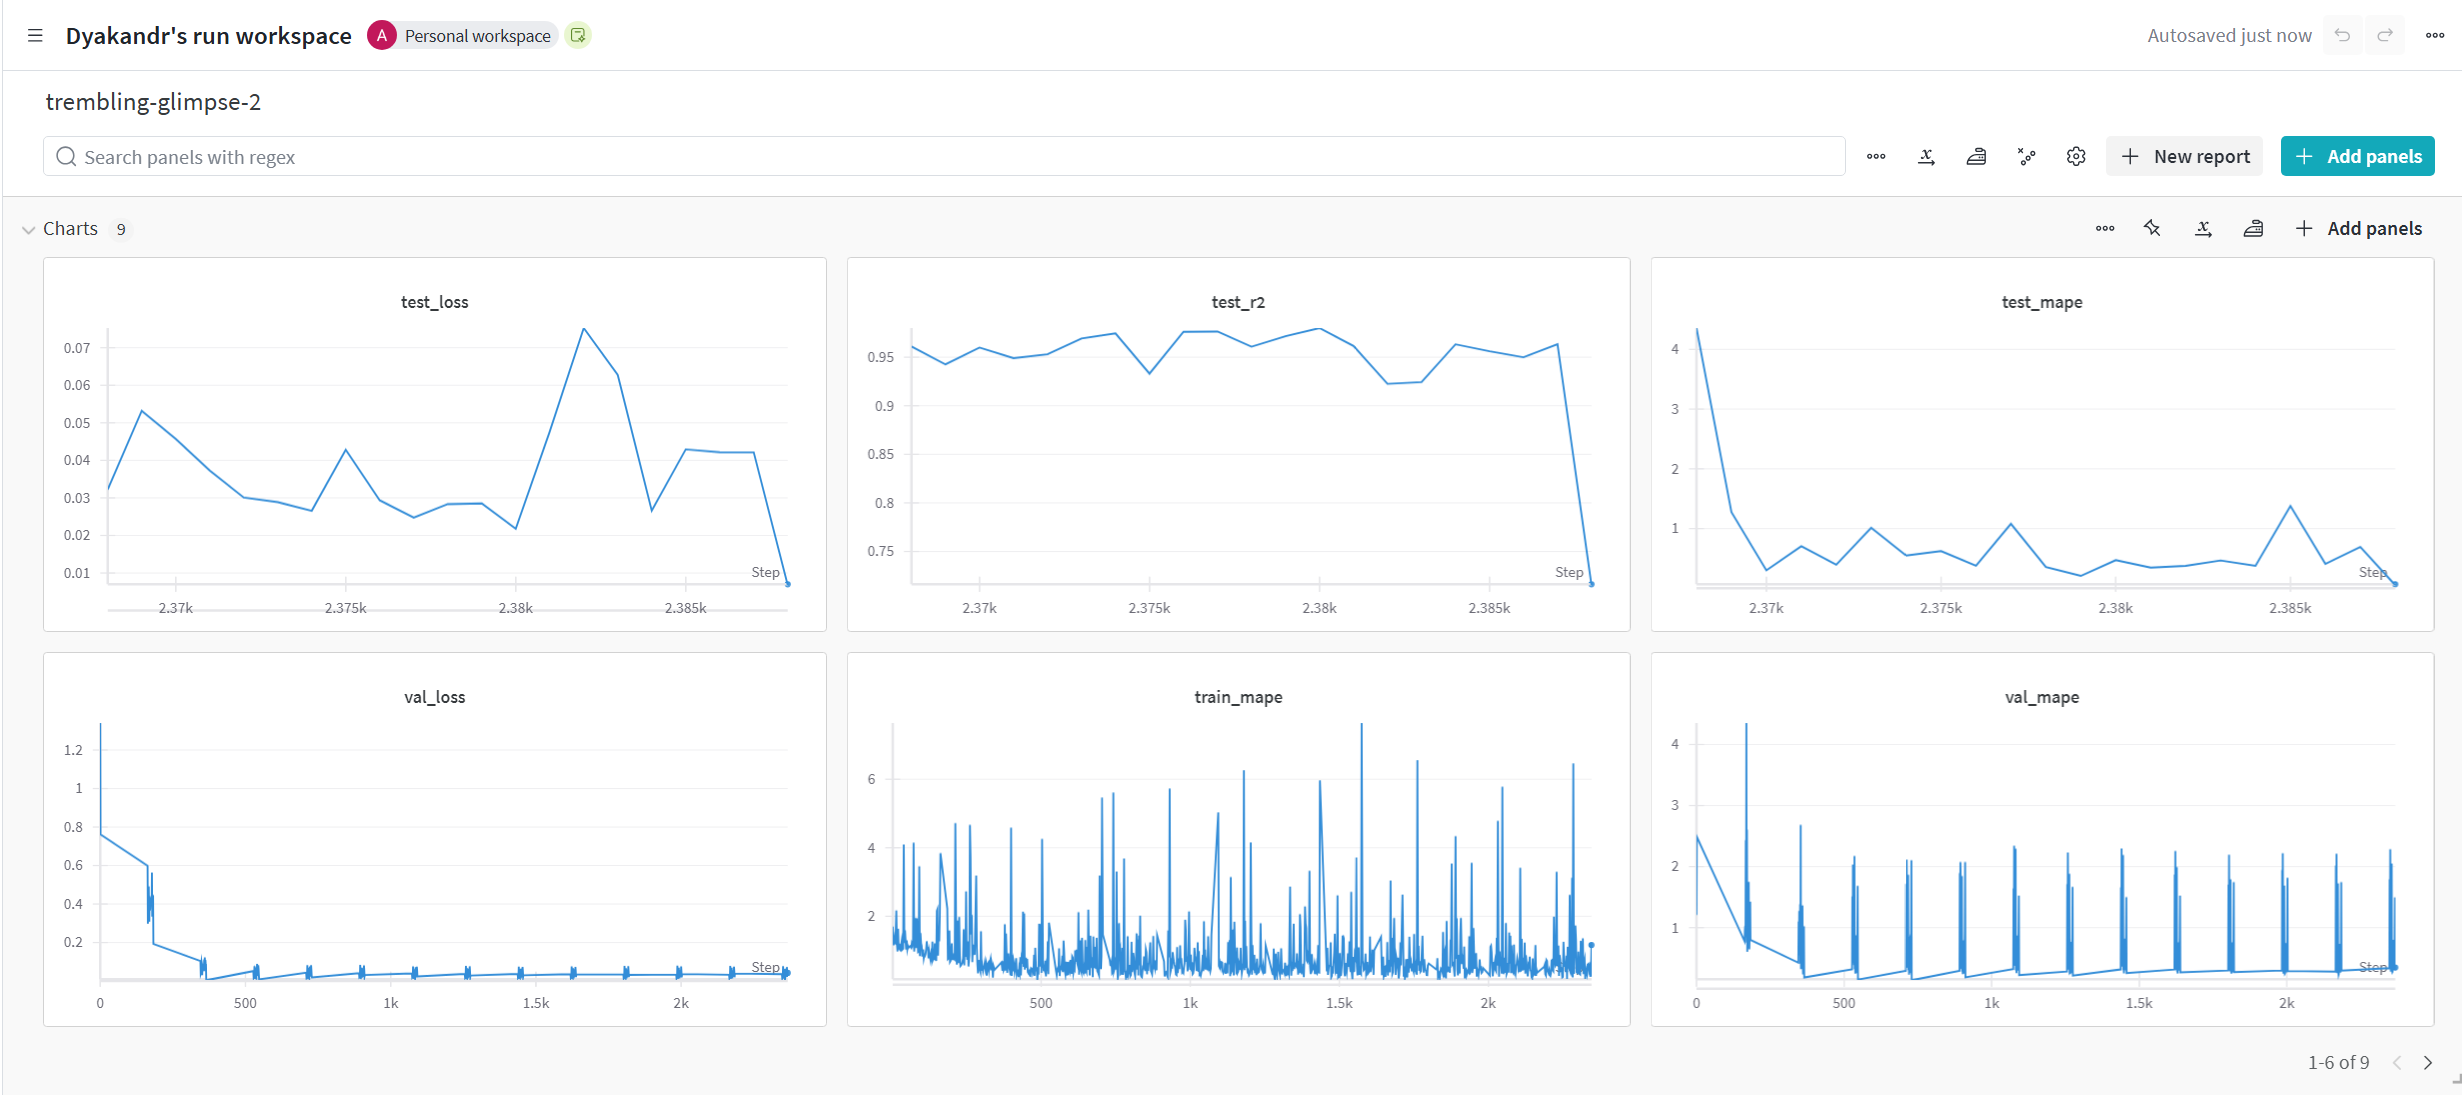

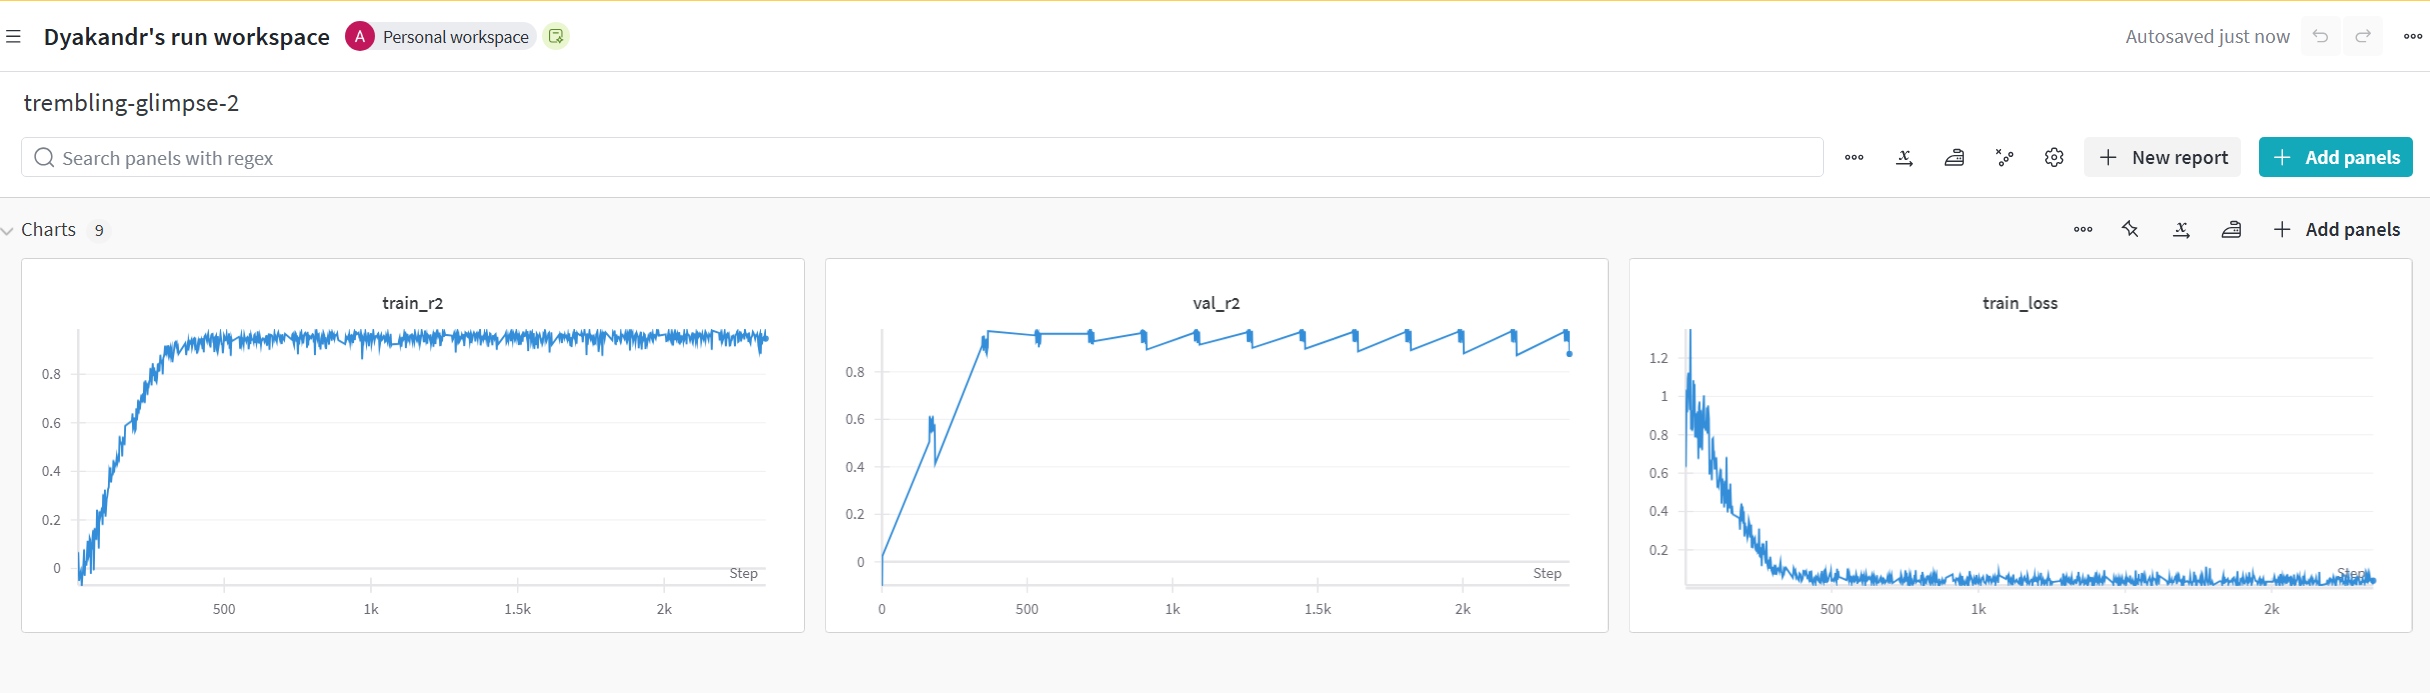

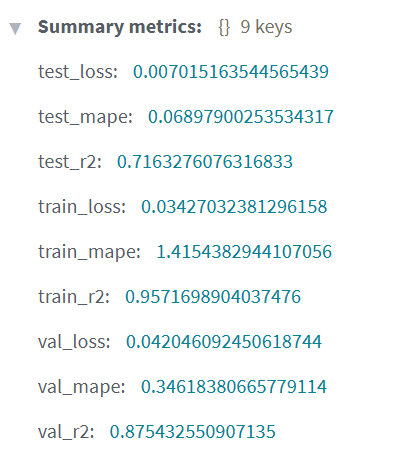